In [1]:
import json
import gzip
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
with open("../data/sentiment/train.json") as infile:
    data = json.load(infile)

In [3]:
df = pd.DataFrame(data=data)

In [4]:
df.head()

,text,start_char_pos,end_char_pos,important_span_text,sentiment
0,Epic Games has raised $2 billion in funding fr...,11,43,has raised $2 billion in funding,positive
1,The Halt is the best thing that’s happened to ...,16,42,best thing that’s happened,positive
2,#HelloFuture would just be augmented to #Hello...,13,41,would just be augmented to #,positive
3,A show of confidence that HBAR can stand on it...,31,63,can stand on its own as an asset,negative
4,": we want it, you need it!",0,13,": we want it,",positive


In [5]:
df["len"] = df.text.apply(lambda x: len(x))

<AxesSubplot:>

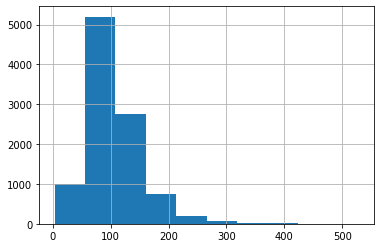

In [6]:
df.len.hist()

<AxesSubplot:>

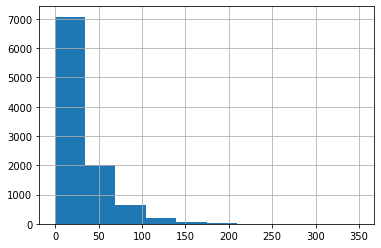

In [7]:
df.start_char_pos.hist()

<AxesSubplot:>

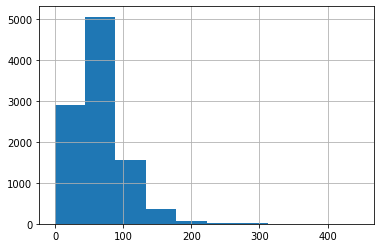

In [8]:
df.end_char_pos.hist()

In [9]:
df.sentiment.value_counts()

positive    5992
negative    4008
Name: sentiment, dtype: int64

In [10]:
c = {
    "positive": Counter(),
    "negative": Counter()
}

for row in df.itertuples():
    c[row.sentiment] += Counter(row.important_span_text.split(" "))

In [11]:
c["positive"].most_common(20)

[('a', 1328),
 ('the', 1160),
 ('of', 855),
 ('to', 835),
 ('is', 637),
 ('has', 622),
 ('and', 563),
 ('in', 379),
 ('rating', 364),
 ('its', 362),
 ('will', 287),
 ('quarterly', 272),
 ('an', 271),
 ('earnings', 256),
 ('up', 191),
 ('for', 189),
 ('potential', 182),
 ('shares', 179),
 ('be', 178),
 ('Get', 177)]

In [12]:
c["negative"].most_common(20)

[('a', 829),
 ('to', 788),
 ('the', 687),
 ('of', 629),
 ('has', 523),
 ('is', 492),
 ('not', 272),
 ('and', 266),
 ('are', 234),
 ('price', 202),
 ('down', 193),
 ('in', 191),
 ('be', 187),
 ('from', 177),
 ('their', 165),
 ('for', 158),
 ('market', 157),
 ('its', 153),
 ('rating', 145),
 ('been', 127)]

In [13]:
words = set(list(c["positive"].keys()) + list(c["negative"].keys()))

In [14]:
len(words)

10012

In [15]:
ratio = {
    "positive": Counter(),
    "negative": Counter()
}

for word in words:
    p, n = c["positive"].get(word, 0), c["negative"].get(word, 0)
    total = p + n
    if total < 50:
        continue
    ratio["positive"][word] = p / total
    ratio["negative"][word] = n / total

In [16]:
ratio["positive"].most_common(20)

[('grow', 1.0),
 ('topping', 1.0),
 ('beating', 1.0),
 ('declared', 1.0),
 ('“Buy”', 1.0),
 ('dividend,', 0.989247311827957),
 ('upside', 0.9888888888888889),
 ('quarterly', 0.9819494584837545),
 ('capitalization', 0.9818181818181818),
 ('raised', 0.9797979797979798),
 ('dividend', 0.9763779527559056),
 ('leading', 0.9714285714285714),
 ('recently', 0.97),
 ('average', 0.9642857142857143),
 ('Get', 0.9619565217391305),
 ('positive', 0.9571428571428572),
 ('Rating)', 0.9517241379310345),
 ('posted', 0.9384615384615385),
 ('data', 0.9325153374233128),
 ('strong', 0.9310344827586207)]

In [17]:
ratio["negative"].most_common(20)

[('dropped', 1.0),
 ('lowered', 1.0),
 ('downgraded', 1.0),
 ('below', 1.0),
 ('adverse', 1.0),
 ('loss', 1.0),
 ('no', 0.9855072463768116),
 ('missing', 0.984375),
 ('low', 0.9838709677419355),
 ('down', 0.965),
 ('cap', 0.9621212121212122),
 ('not', 0.9611307420494699),
 ('any', 0.896551724137931),
 ('ratio', 0.8888888888888888),
 ('cut', 0.8767123287671232),
 ('lower', 0.8461538461538461),
 ('had', 0.7739130434782608),
 ('or', 0.74),
 ('sell', 0.7333333333333333),
 ('estimates', 0.7297297297297297)]

In [18]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
tokenizer(": we want it, you need it!")

{'input_ids': [0, 35, 52, 236, 24, 6, 47, 240, 24, 328, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [20]:
tokenizer(": we want it,")

{'input_ids': [0, 35, 52, 236, 24, 6, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [21]:
tokenizer.decode(35)

2022-04-24 15:55:00.139932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 15:55:00.139951: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


':'

In [22]:
def seq(a, b):
    return [x for x in range(len(a) + 1) if a[x:x+len(b)] == b]

In [23]:
X = []

for row in df.itertuples():
    encoded = tokenizer(row.text)
    txt = encoded["input_ids"]
    y = [0]
    l = 0
    p = 1 if row.sentiment == "positive" else 2
    
    for token in txt[1:-1]:
        l += len(tokenizer.decode(token))
        
        if row.start_char_pos <= l <= row.end_char_pos + 1:
            y.append(p)
        else:
            y.append(0)
        
    y.append(0)
    encoded["labels"] = y
    X.append(encoded)

In [24]:
X[0]

{'input_ids': [0, 39318, 636, 3100, 34, 1179, 68, 176, 325, 11, 1435, 31, 6366, 8, 5, 23863, 284, 4, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]}

In [25]:
from datasets import Dataset

In [26]:
from transformers import DataCollatorForTokenClassification

In [27]:
from transformers import create_optimizer
from transformers import TFAutoModelForTokenClassification
import tensorflow as tf

In [28]:
ds = Dataset.from_pandas(pd.DataFrame(X))

In [29]:
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer, return_tensors="tf")

In [30]:
tf_train_set = ds.to_tf_dataset(
    columns=["attention_mask", "input_ids", "labels"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

/home/evaldas/miniconda3/envs/rnd/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
2022-04-24 15:55:04.923545: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-24 15:55:04.923570: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-24 15:55:04.923586: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eka-thinkpad): /proc/driver/nvidia/version does not exist
2022-04-24 15:55:04.923855: I tensorflow/core/pl

In [31]:
batch_size = 16
num_train_epochs = 3
num_train_steps = (len(X) // batch_size) * num_train_epochs

optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0,
)

In [32]:
model = TFAutoModelForTokenClassification.from_pretrained("roberta-base", num_labels=3)

All model checkpoint layers were used when initializing TFRobertaForTokenClassification.

Some layers of TFRobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour, please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [34]:
model.fit(x=tf_train_set, epochs=3)

2022-04-24 15:55:08.098332: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
625/625 [==============================] - 1618s 3s/step - loss: 0.4466
Epoch 2/3
625/625 [==============================] - 1569s 3s/step - loss: 0.2848
Epoch 3/3
625/625 [==============================] - 1565s 3s/step - loss: 0.2101


In [36]:
with open("../data/sentiment/testing.json") as infile:
    data = json.load(infile)

In [37]:
len(data)

10000

In [38]:
data[0]

{'text': 'Analysts say investors should buy energy stocks because they are still cheap .'}

In [58]:
tokenizer(data[1]["text"])

{'input_ids': [0, 32397, 850, 40, 1095, 239, 42, 76, 6, 576, 5, 7867, 1503, 7, 17728, 810, 479, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [59]:
pred = model.predict(tokenizer(data[1]["text"])["input_ids"])[0]

In [53]:
from scipy.special import softmax

In [62]:
np.round(softmax(pred, axis=2), 2)

array([[[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[0.99, 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[0.99, 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[0.98, 0.01, 0.01]],

       [[0.99, 0.  , 0.  ]],

       [[0.99, 0.  , 0.01]],

       [[1.  , 0.  , 0.  ]],

       [[0.99, 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]],

       [[1.  , 0.  , 0.  ]]], dtype=float32)

In [63]:
from transformers import pipeline

In [64]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

In [67]:
data[0]["text"]

'Analysts say investors should buy energy stocks because they are still cheap .'

In [118]:
import tqdm

In [119]:
results = []

for row in tqdm.tqdm(data, total=len(data)):
    tokens = tokenizer(row["text"])["input_ids"][1:-1]
    pred = nlp(row["text"])
    
    positions = []

    pos = 0
    sel_start = 0
    sel_end = 0
    sel_ent = None
    prev = "LABEL_0"
    for tok, p in zip(tokens, pred):
        l = len(tokenizer.decode(tok))
        
        ent = p["entity"]
        
        if ent != prev:
            if prev == "LABEL_0":
                sel_start = pos
                sel_ent = ent
                
            else:
                positions.append((sel_start, pos, prev))
        
        #if p["entity"] == "LABEL_0":
        #    continue
            
        #print(tok, p["entity"])
        pos += l
        prev = ent
        
    if ent != "LABEL_0":
        positions.append((sel_start, pos, ent))
        
    if len(positions) < 1:
        results.append((0, 0, 0))
    else:
        results.append(max(positions, key=lambda x: x[1] - x[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [21:05<00:00,  7.90it/s]


In [120]:
res = pd.DataFrame(data=results, columns=["start", "end", "label"])
res.fillna(0, inplace=True)

In [121]:
res.label.value_counts()

LABEL_1    5814
LABEL_2    4000
0           186
Name: label, dtype: int64

In [122]:
res["text"] = [x["text"] for x in data]

In [123]:
res

,start,end,label,text
0,55,77,LABEL_1,Analysts say investors should buy energy stock...
1,3,30,LABEL_1,"Oil prices will stay high this year, given the..."
2,5,35,LABEL_2,There are chronic shortages related to underin...
3,17,32,LABEL_1,The energy sector is up over 30% this year .
4,32,67,LABEL_1,"Berkshire Hathaway BRK.B, +2.64% bought anothe..."
...,...,...,...,...
9995,9,26,LABEL_2,Just don't be the slowest gazelle .
9996,17,45,LABEL_1,Antero Resources is rated as an Industry Buy ...
9997,127,156,LABEL_1,The specific formulation of each metric is det...
9998,16,44,LABEL_1,Antero Resources is rated as an Industry Buy i...


In [130]:
submission = res.reset_index().rename(columns={"index": "id"})[["id", "start", "end"]]

In [131]:
submission.to_csv("../predictions/t2_roberta_v1.csv", index=False)

In [132]:
model.save("../models/t2_roberta_v1")

2022-04-24 21:24:36.081460: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/t2_roberta_v1/assets


INFO:tensorflow:Assets written to: ../models/t2_roberta_v1/assets
